In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"/DIR/ParamData.csv") #load the params csv
df.head()

Unnamed: 0.1  Unnamed: 0  Difference in Followers                 Party  \
0             0           0                   -205.0                   VVD   
1            12          12                    346.0                    SP   
2            24          24                    -23.0                   SGP   
3            36          36                    102.0  Wopke-Hoekstra (CDA)   
4            48          48                    459.0  Thierry-Baudet (FVD)   

   AverageScore  AverageScoreMin  AverageScoreMax  AverageScoreStd  \
0     -0.270076            -4.48             4.68         2.014284   
1     -0.870205           -13.00            11.39         3.090981   
2     -4.695143           -28.00             0.89         9.606750   
3     -0.776667            -2.20             2.76         1.631387   
4     -0.723213           -13.74             9.22         2.621491   

   AveragetotalInteraction  AveragetotalInteractionMin  ...  AverageAngryMax  \
0               372.480916                        73.0  ...              9.0   
1               363.543590                        18.0  ...             28.0   
2                 3.914286                         0.0  ...              0.0   
3               152.666667                        69.0  ...              1.0   
4              1090.212851                        63.0  ...            217.0   

   AverageAngryStd  AverageCare  AverageCareMin  AverageCareMax  \
0         1.723062    25.320611             1.0           304.0   
1         3.919325     4.743590             0.0            87.0   
2         0.000000     0.000000             0.0             0.0   
3         0.372678     0.666667             0.0             1.0   
4        19.202845    24.975904             0.0          1230.0   

   AverageCareStd  AveragePostVideoCount  AveragePostVideoCountMin  \
0       46.243674               0.465649                       0.0   
1       11.914047               1.584615                       0.0   
2        0.000000               0.057143                       0.0   
3        0.471405              19.333333                       0.0   
4       93.808783               2.935743                       0.0   

   AveragePostVideoCountMax  AveragePostVideoCountStd  
0                       5.0                  0.884970  
1                      84.0                  6.546619  
2                       1.0                  0.232115  
3                     113.0                 41.903328  
4                     238.0                 16.189512  

[5 rows x 48 columns]

In [ ]:
import pandas as pd
def Save_Column(csv,List,name):
  #print(csv,List,name)
  df1=pd.read_csv(csv)
  #print(df.head())
  df1[name]=List
  df1.to_csv(csv,index=False)

In [ ]:
def ParseMinMaxStd(csv,array):
  df=pd.read_csv(csv)
  min=array+"Min"
  max=array+"Max"
  Std=array+"Std"



In [ ]:
Party=df["Party"]
for i in Party:
  print(Party)
DifferencesinVotes=[-17,-12,+2,-29,-71,-17,+22,-9,-9,+2,+22,-10,-10,-4,-9,-9,-7,-29,5,-7,+11,-12,-71,-6,-4,0,137] #retrieved from wikipedia, standardised methodoology would scrape the page
Total2023Votes=[63,23,16,43,15,63,22,32,22,16,22,51,51,0,32,22,46,43,25,46,11,23,15,34,0,0,137] #retrieved from wikipedia, standardised methodoology would scrape the page
#print(len(DifferencesinVotes),len(Total2023Votes))
Save_Column(r"/DIR/Derived_Datasets/ParamData.csv",DifferencesinVotes,"Delta from 2019")
Save_Column(r"/DIR/Derived_Datasets/ParamData.csv",Total2023Votes,"Total Votes 2023")

0                           VVD
1                            SP
2                           SGP
3          Wopke-Hoekstra (CDA)
4          Thierry-Baudet (FVD)
5                Mark-Rutte-VVD
6         Joost-Eerdmans (JA21)
7             Sigrid-Kaag (D66)
8            Mirjam-Bikker (CU)
9     Kees-van-der-Staaij (SGP)
10                         JA21
11    Jesse-Klaver (Groenlinks)
12                   GroenLinks
13         Farid-Azarkan (DENK)
14                          D66
15                 ChristenUnie
16          Attje-Kuiken (PvdA)
17                          CDA
18                         PvdD
19                         PvdA
20               Volt-Nederland
21      Lilian-Marijnissen (SP)
22                          FVD
23          Geert-Wilders (PVV)
24                         DENK
25                         BIJ1
26                          BBB
Name: Party, dtype: object
0                           VVD
1                            SP
2                           SGP
3          Wo

In [ ]:
AverageScore=df["AverageScore"] #The variables we want to use from params.
AverageScoreMin=df["AverageScoreMin"]
AverageScoreMax=df["AverageScoreMax"]
AverageScoreStd=df["AverageScoreStd"]
FollowsDiff=df["Difference in Followers"]

In [ ]:
def Normalise(Array):
  New_List=[]
  for i in Array:
    j=(i-min(Array))/(max(Array)-min(Array)) # for the sake of plotting and comparison
    New_List.append(j)
  return New_List

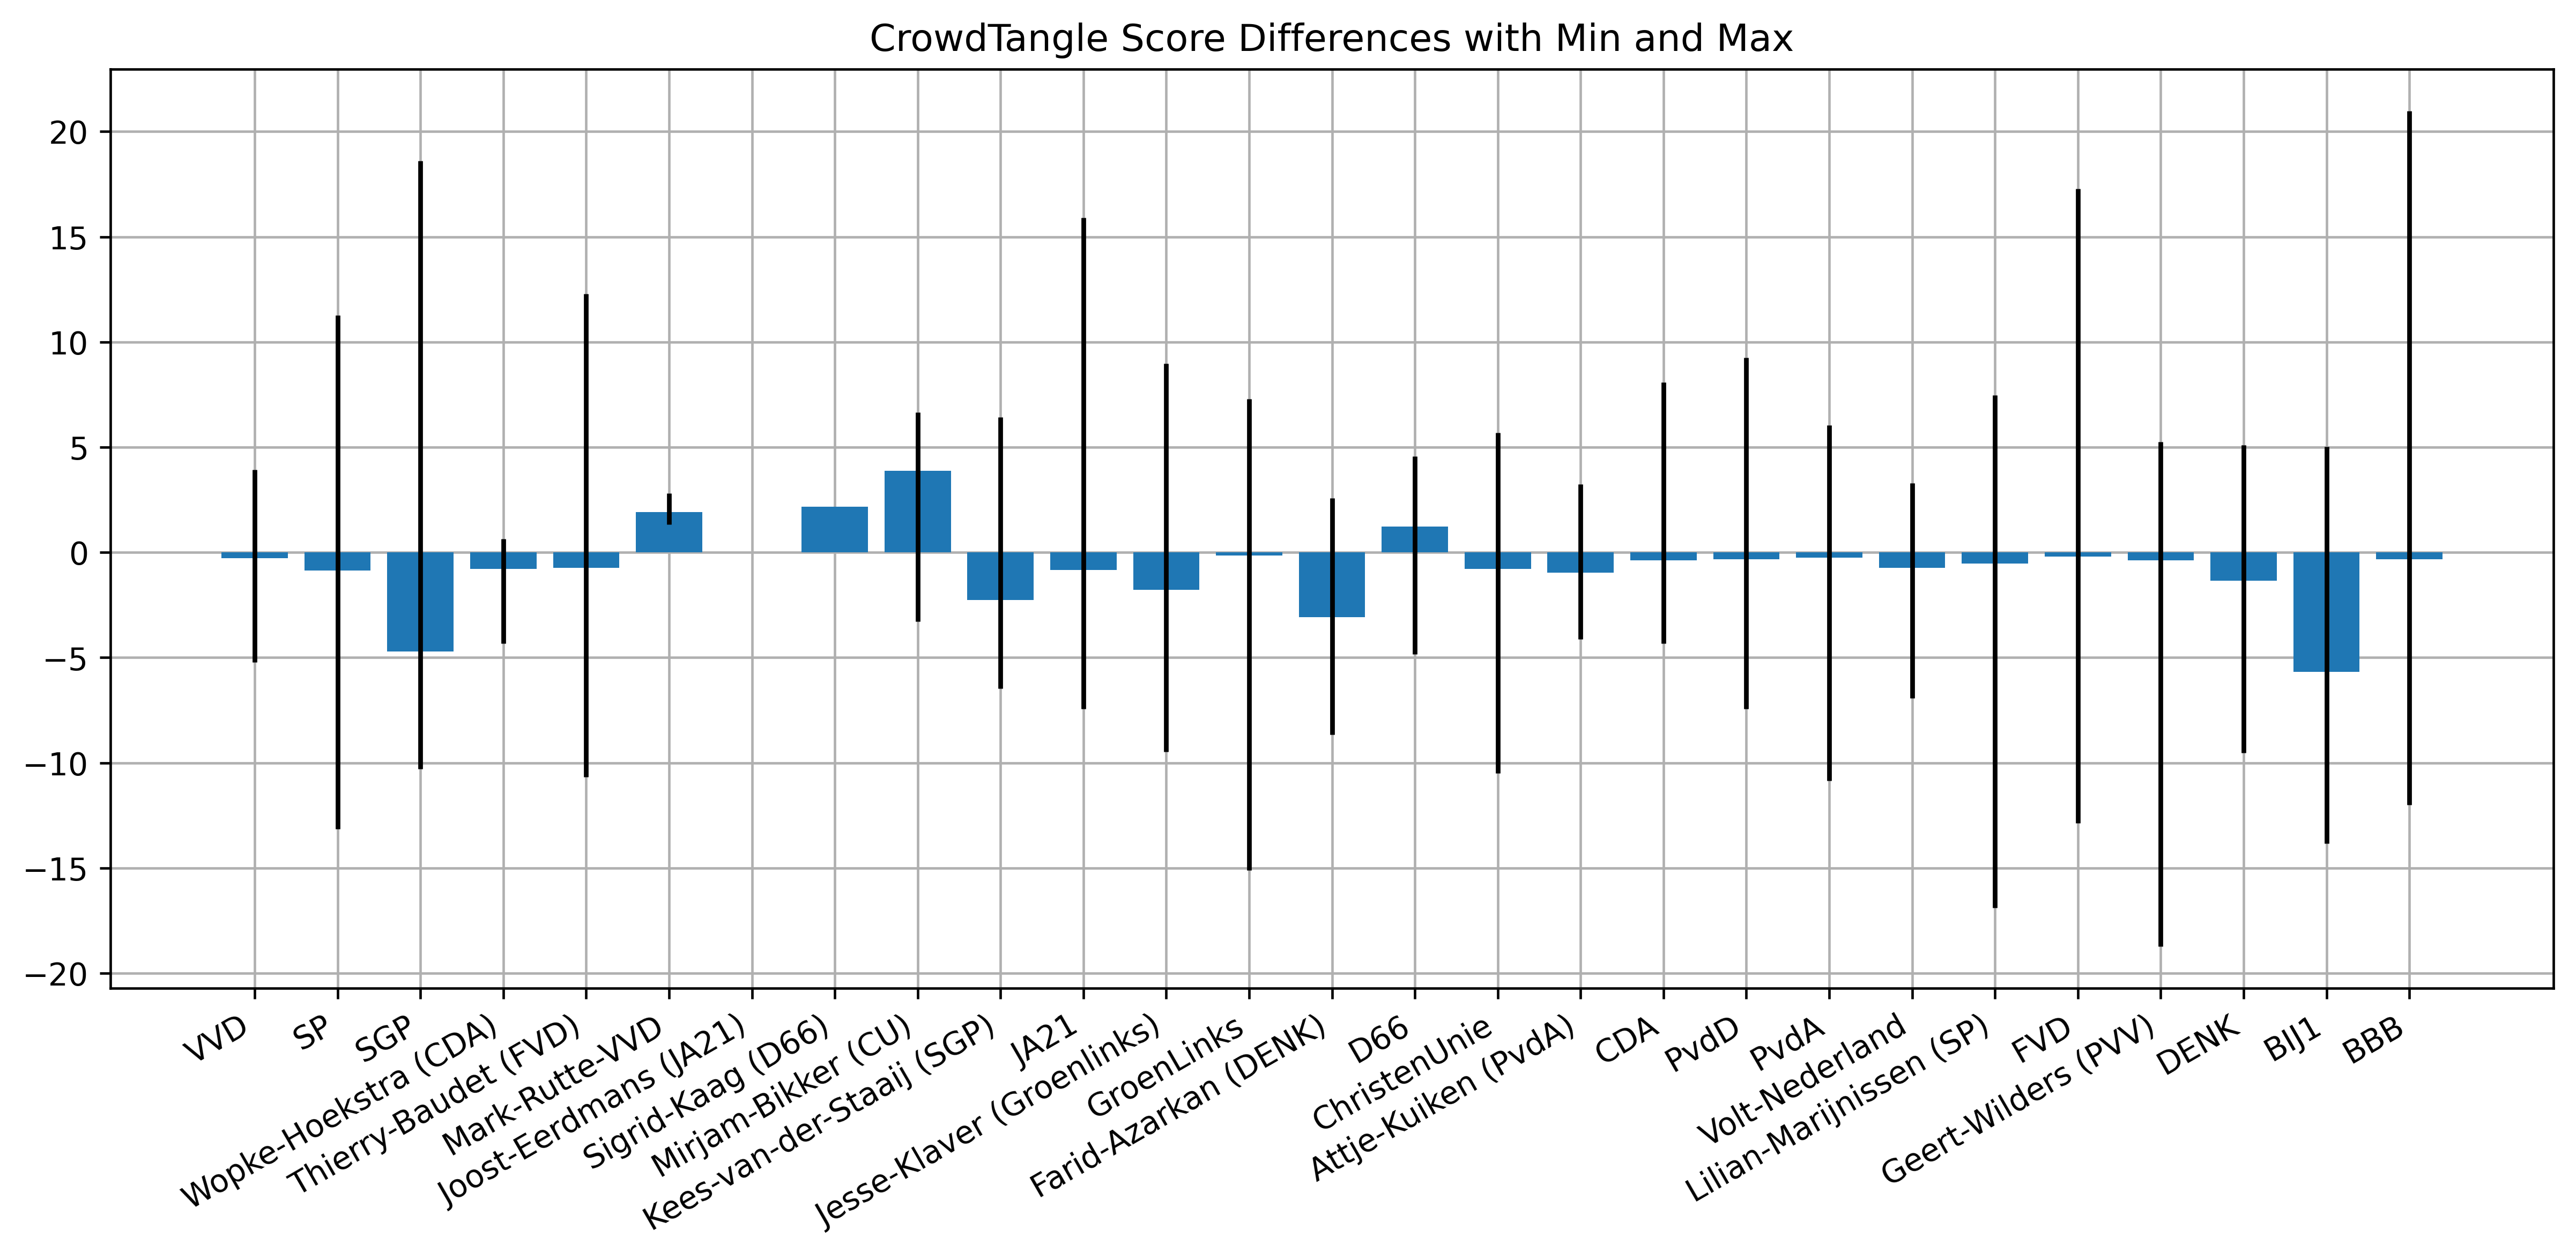

In [ ]:
fig, ax = plt.subplots (figsize=(14,6), dpi=420)
plt.title("CrowdTangle Score Differences with Min and Max")
fig.autofmt_xdate() #Diagonal ticks
plt.autoscale()
ax.grid(True,zorder=-0.5) #Have the grid behind. this works.
yerr=[abs(AverageScore-AverageScoreMax),abs(AverageScore-AverageScoreMin)] #here the error bars are min and max rather than std
ax.bar(Party,AverageScore,yerr=yerr,zorder=5)
plt.savefig("CrowdTangle Score Differences with Min and Max.png")

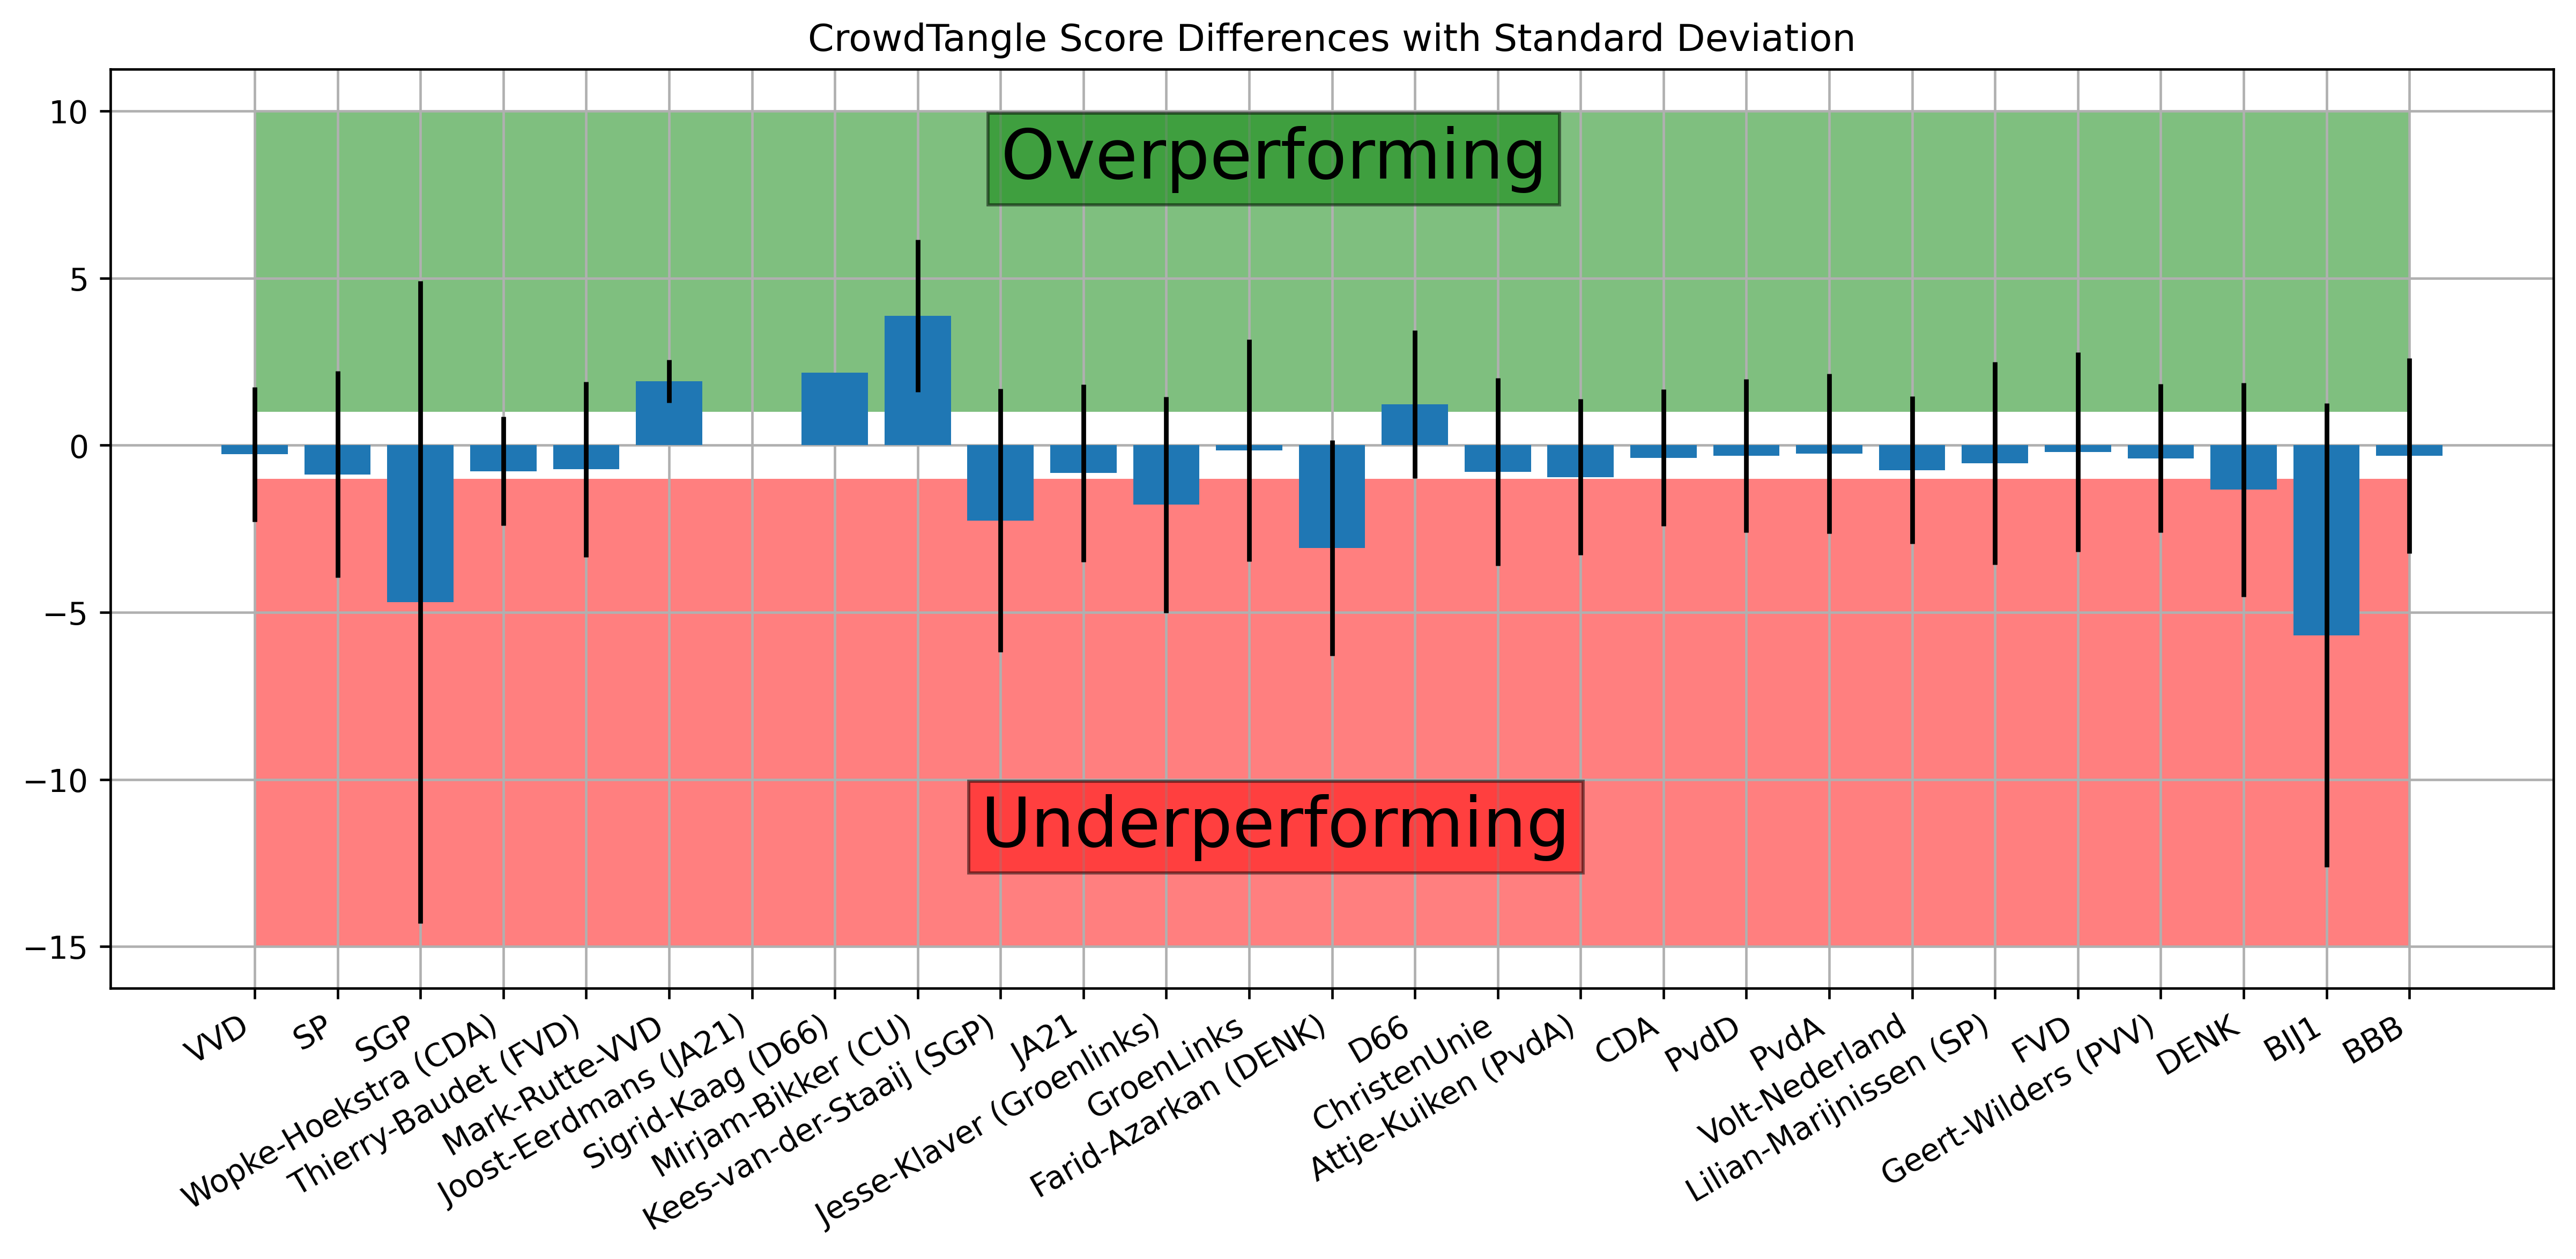

In [ ]:
fig, ax = plt.subplots (figsize=(14,6), dpi=420)
plt.title("CrowdTangle Score Differences with Standard Deviation")
fig.autofmt_xdate()
plt.autoscale()
ax.grid(True,zorder=-0.5)
Range=[]
for i in enumerate(Party):
  Range.append(i[0])
ax.bar(Party,AverageScore,yerr=AverageScoreStd,zorder=5)
ax.fill_between(Range,1,10,facecolor='green', alpha=.5) #We will delineate the area in which a page overperforms (>1)
ax.fill_between(Range,-1,-15,facecolor='red', alpha=.5) #And here the underperforming region (<-1)
plt.text((len(Range)/3), 8, 'Overperforming', fontsize=22, bbox=dict(facecolor='green', alpha=0.5)) #the positional arguments are way too ad hoc and should be standardised
plt.text((len(Range)/3.08), -12, 'Underperforming', fontsize=22, bbox=dict(facecolor='red', alpha=0.5)) #the positional arguments are way too ad hoc and should be standardised
plt.savefig("CrowdTangle Score Differences with Standard Deviation.png")

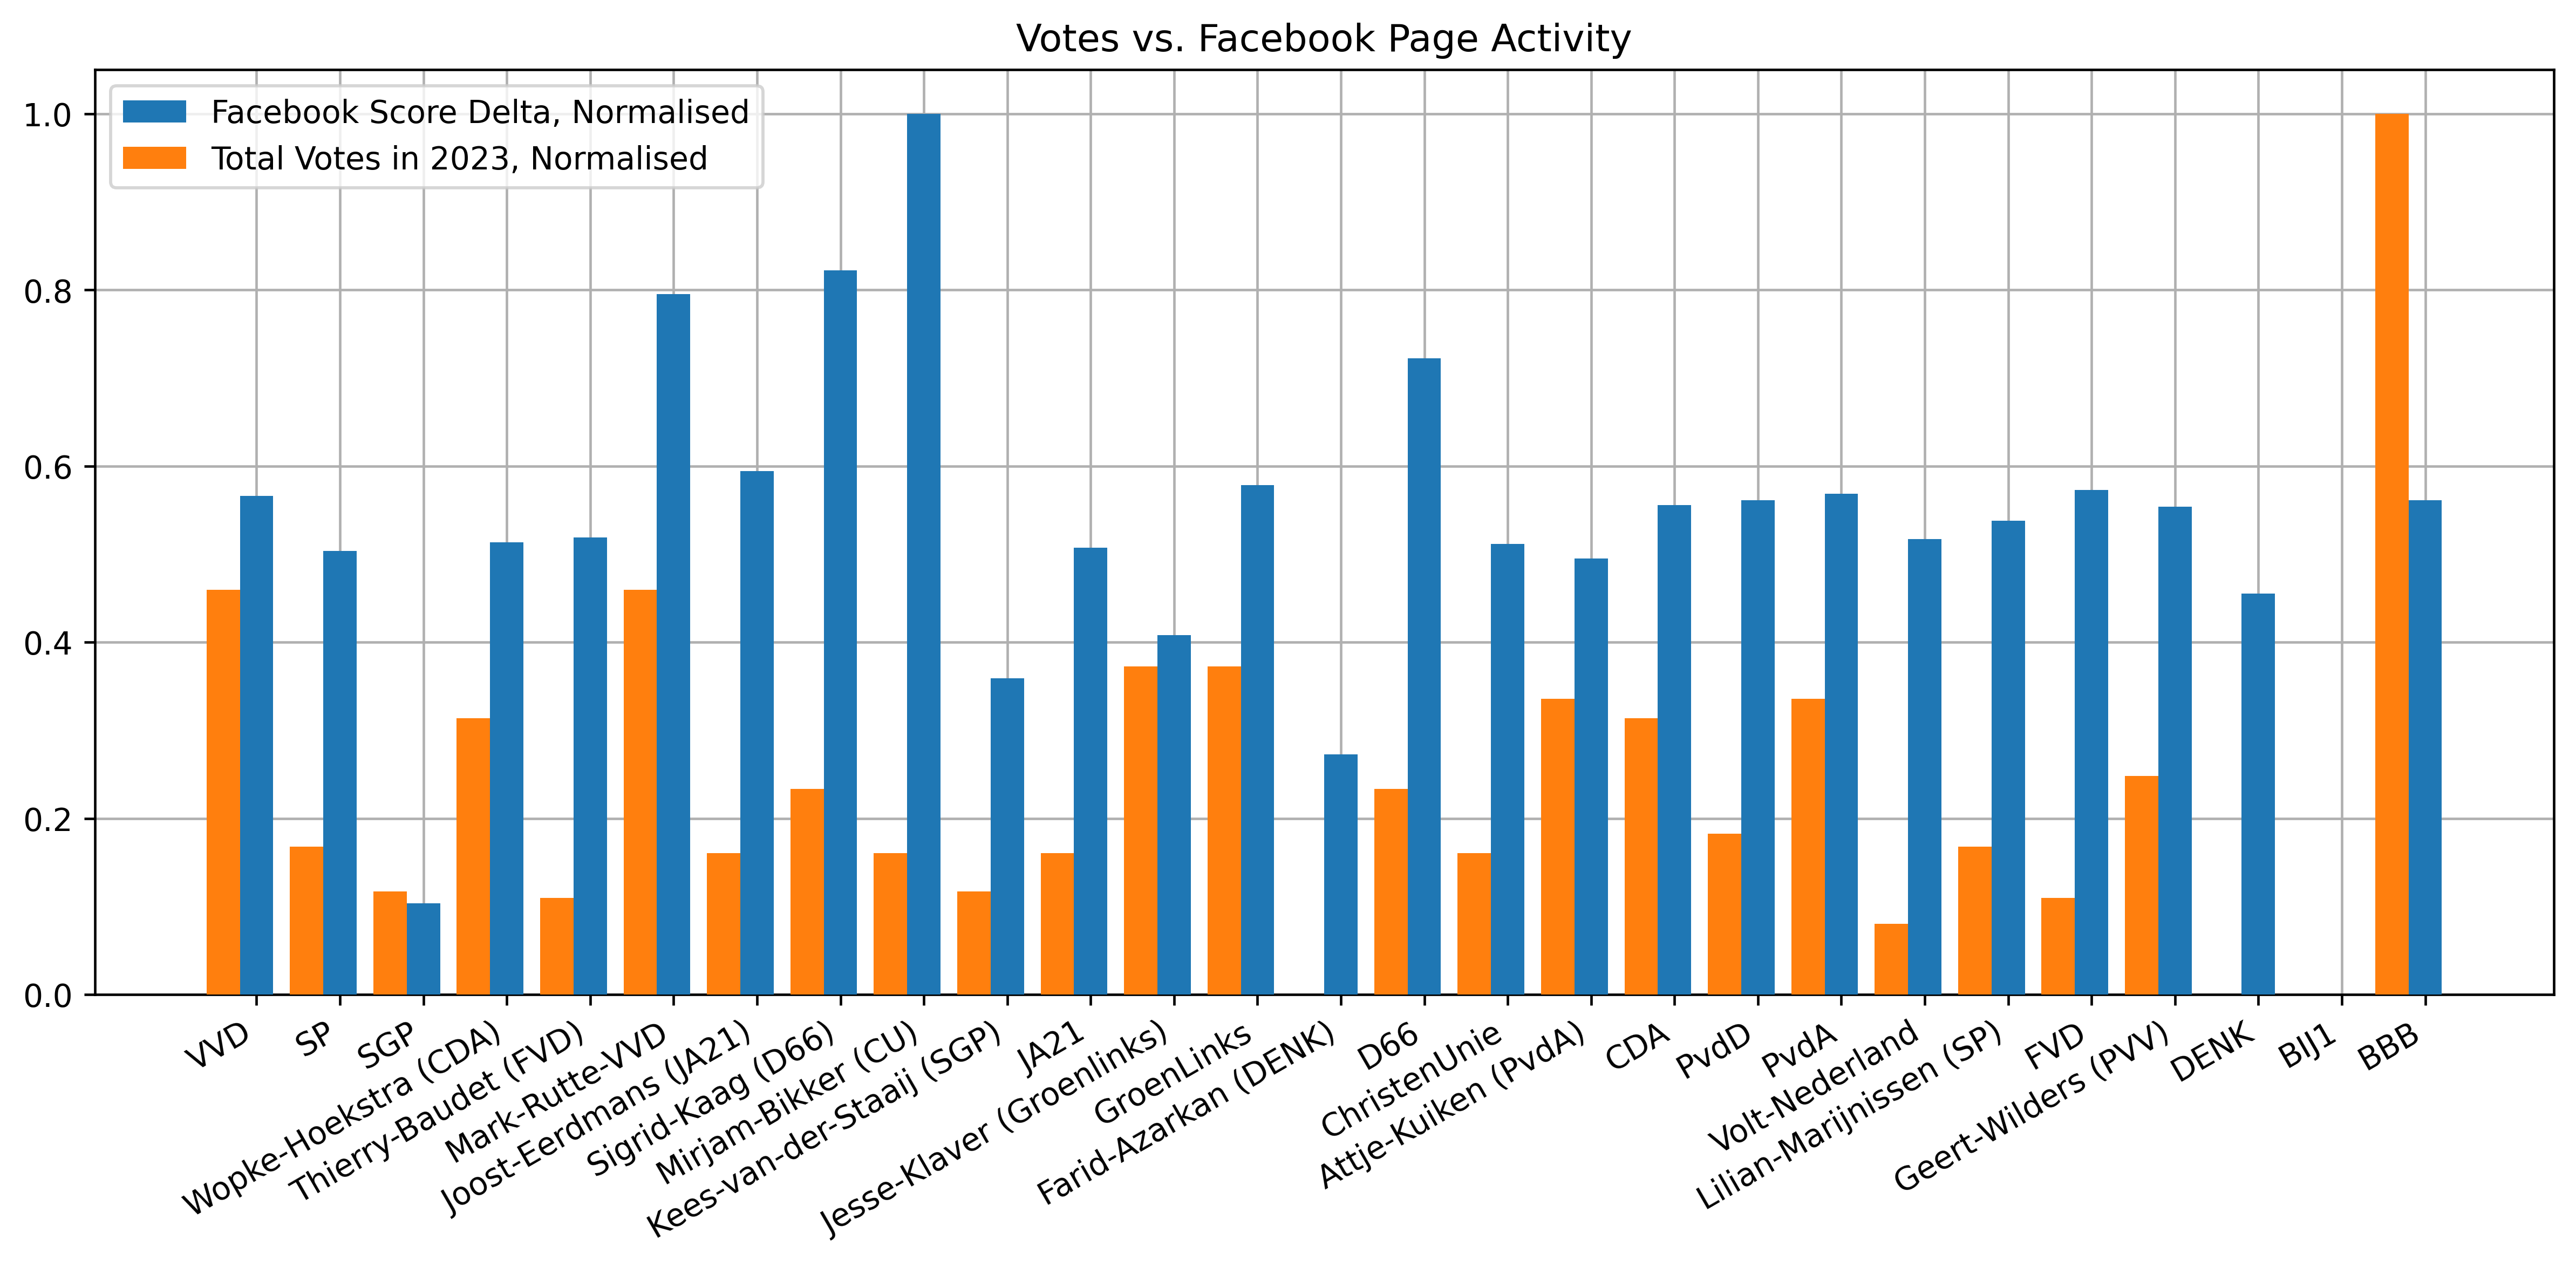

In [ ]:
fig, ax = plt.subplots (figsize=(14,6), dpi=420)
plt.title("Votes vs. Facebook Page Activity")
fig.autofmt_xdate()
plt.autoscale()
ax.grid(True,zorder=-0.5)
ScoreNorm=Normalise(AverageScore)
G1=ax.bar(Party,ScoreNorm,width=0.4,zorder=5)
x=[i for i in range(0,27)]
xtransposed=[]
for i in x:
  xtransposed.append(i-0.4) #Moving the bar graphs to the left to allow both to be shown. There is a better way of doing this for sure (pandas).
VotesNorm=Normalise(Total2023Votes)
G2=ax.bar(xtransposed,VotesNorm,width=0.4,zorder=5)
ax.legend((G1,G2),("Facebook Score Delta, Normalised","Total Votes in 2023, Normalised"))
plt.savefig("Votes vs. Facebook Page Activity.png")

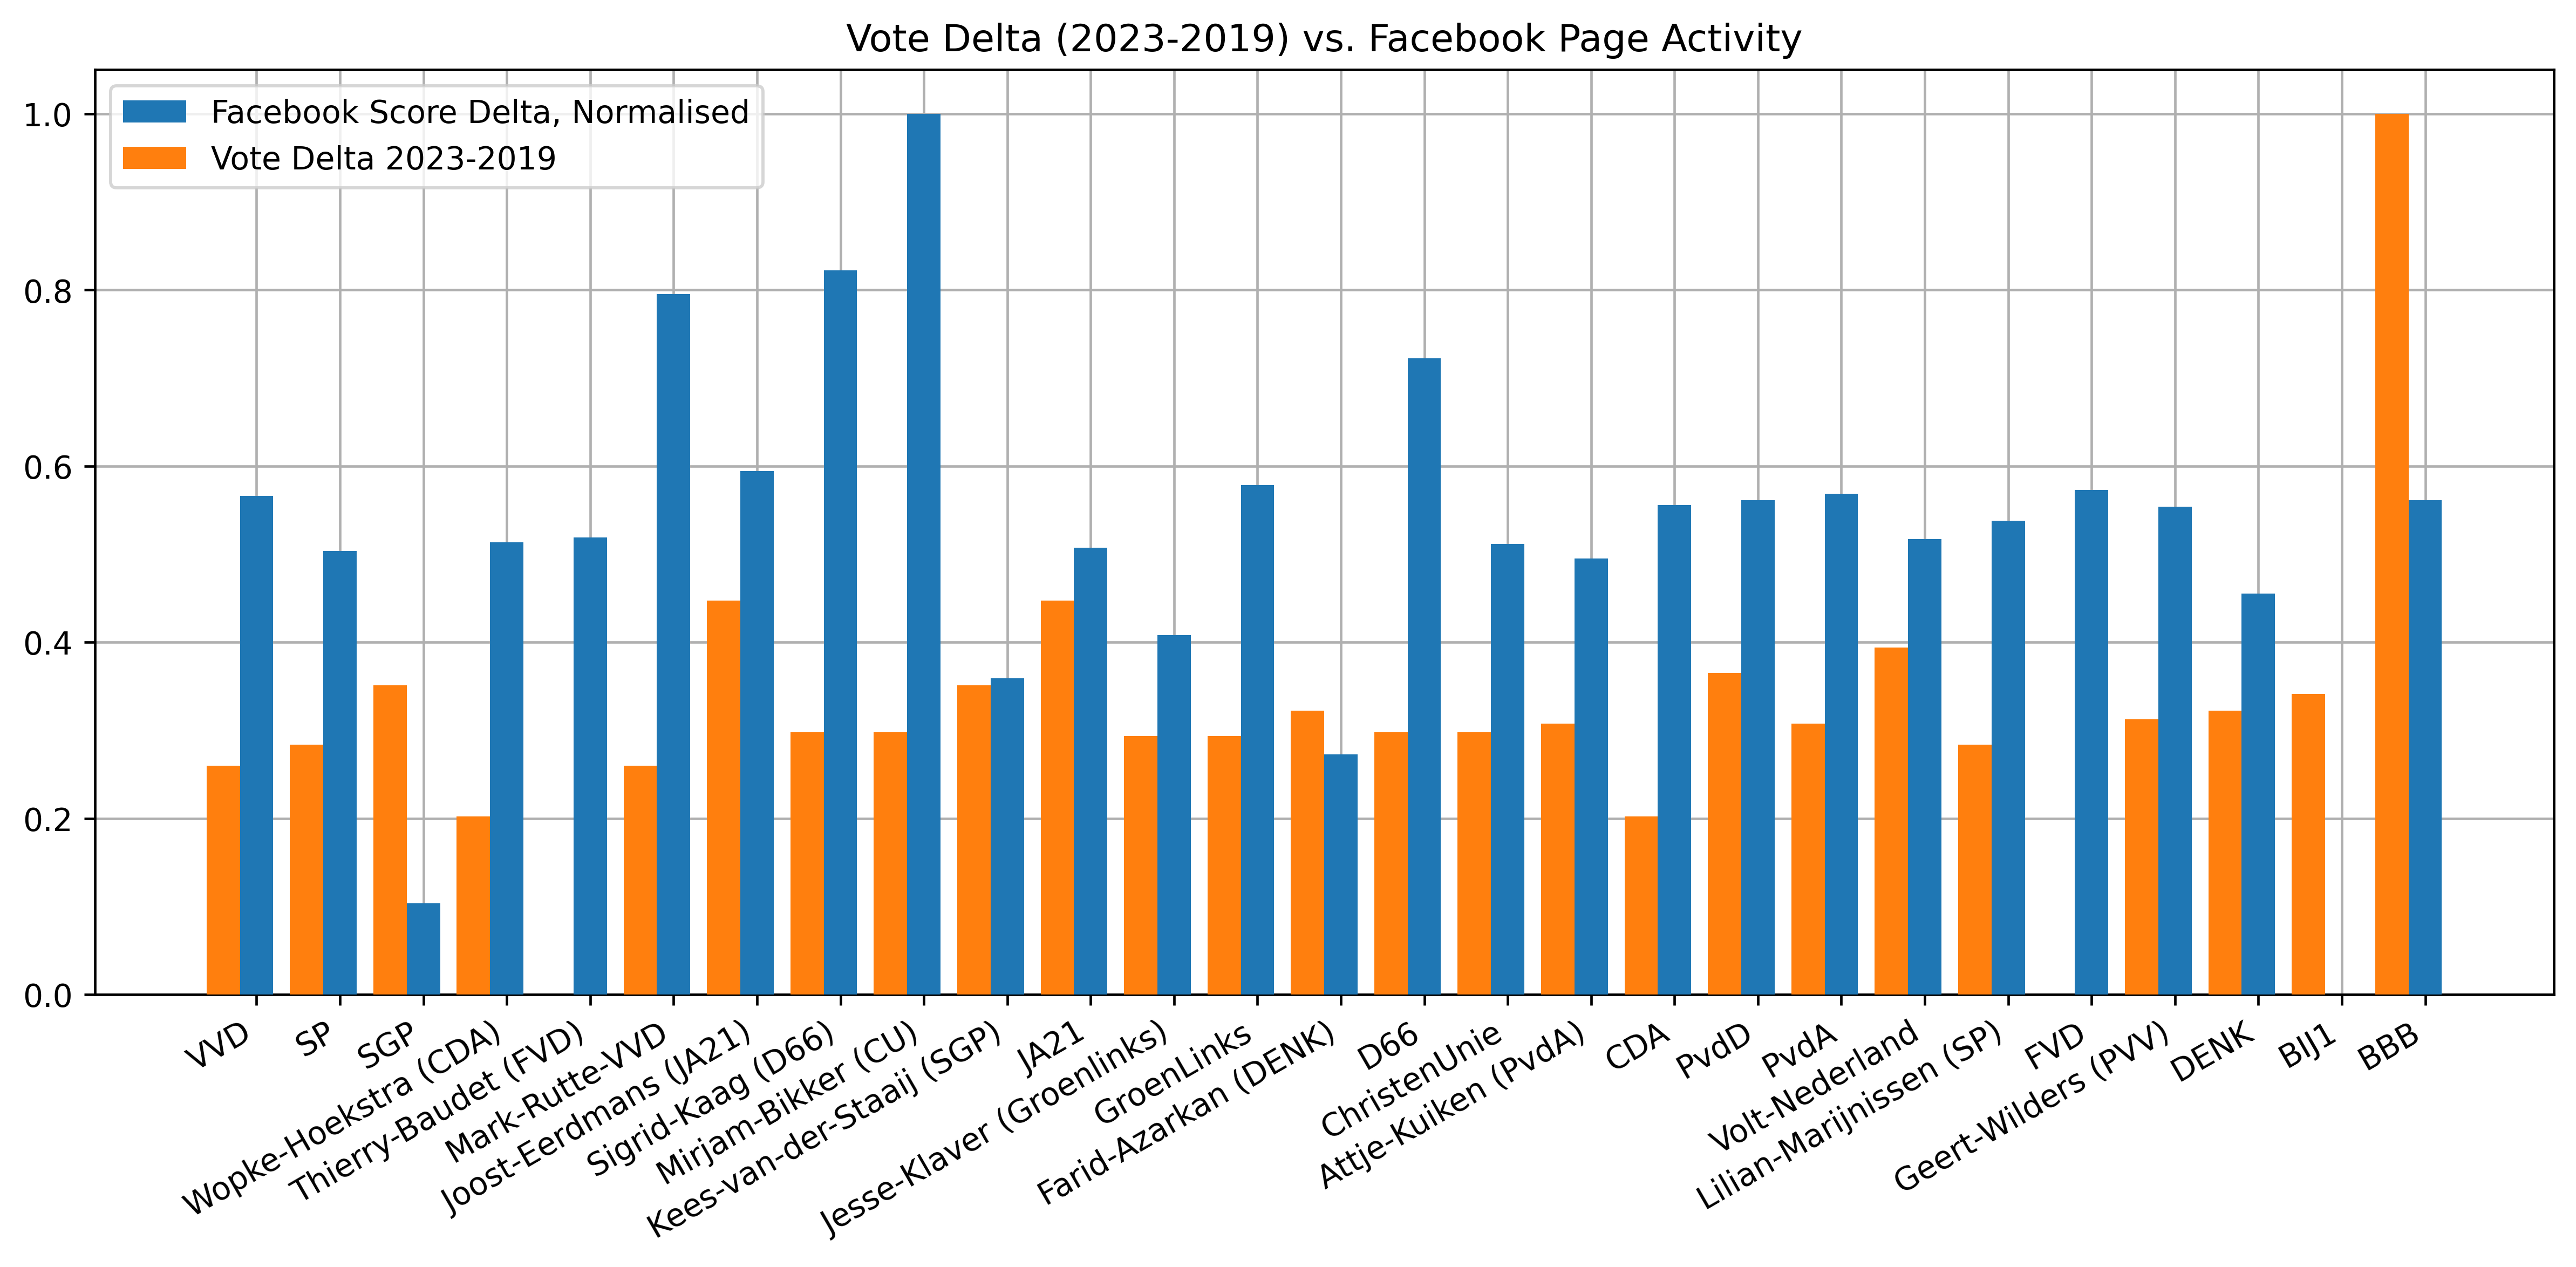

In [ ]:
fig, ax = plt.subplots (figsize=(14,6), dpi=420)
plt.title("Vote Delta (2023-2019) vs. Facebook Page Activity")
fig.autofmt_xdate()
plt.autoscale()
ax.grid(True,zorder=-0.5)
ScoreNorm=Normalise(AverageScore)
G1=ax.bar(Party,ScoreNorm,width=0.4,zorder=5)
x=[i for i in range(0,len(ScoreNorm))]
xtransposed=[]
for i in x:
  xtransposed.append(i-0.4)
VotesDeltaNorm=Normalise(DifferencesinVotes)
G2=ax.bar(xtransposed,VotesDeltaNorm,width=0.4,zorder=5)
ax.legend((G1,G2),("Facebook Score Delta, Normalised","Vote Delta 2023-2019"))
plt.savefig("Votes Delta (2023-2019) vs. Facebook Page Activity.png")

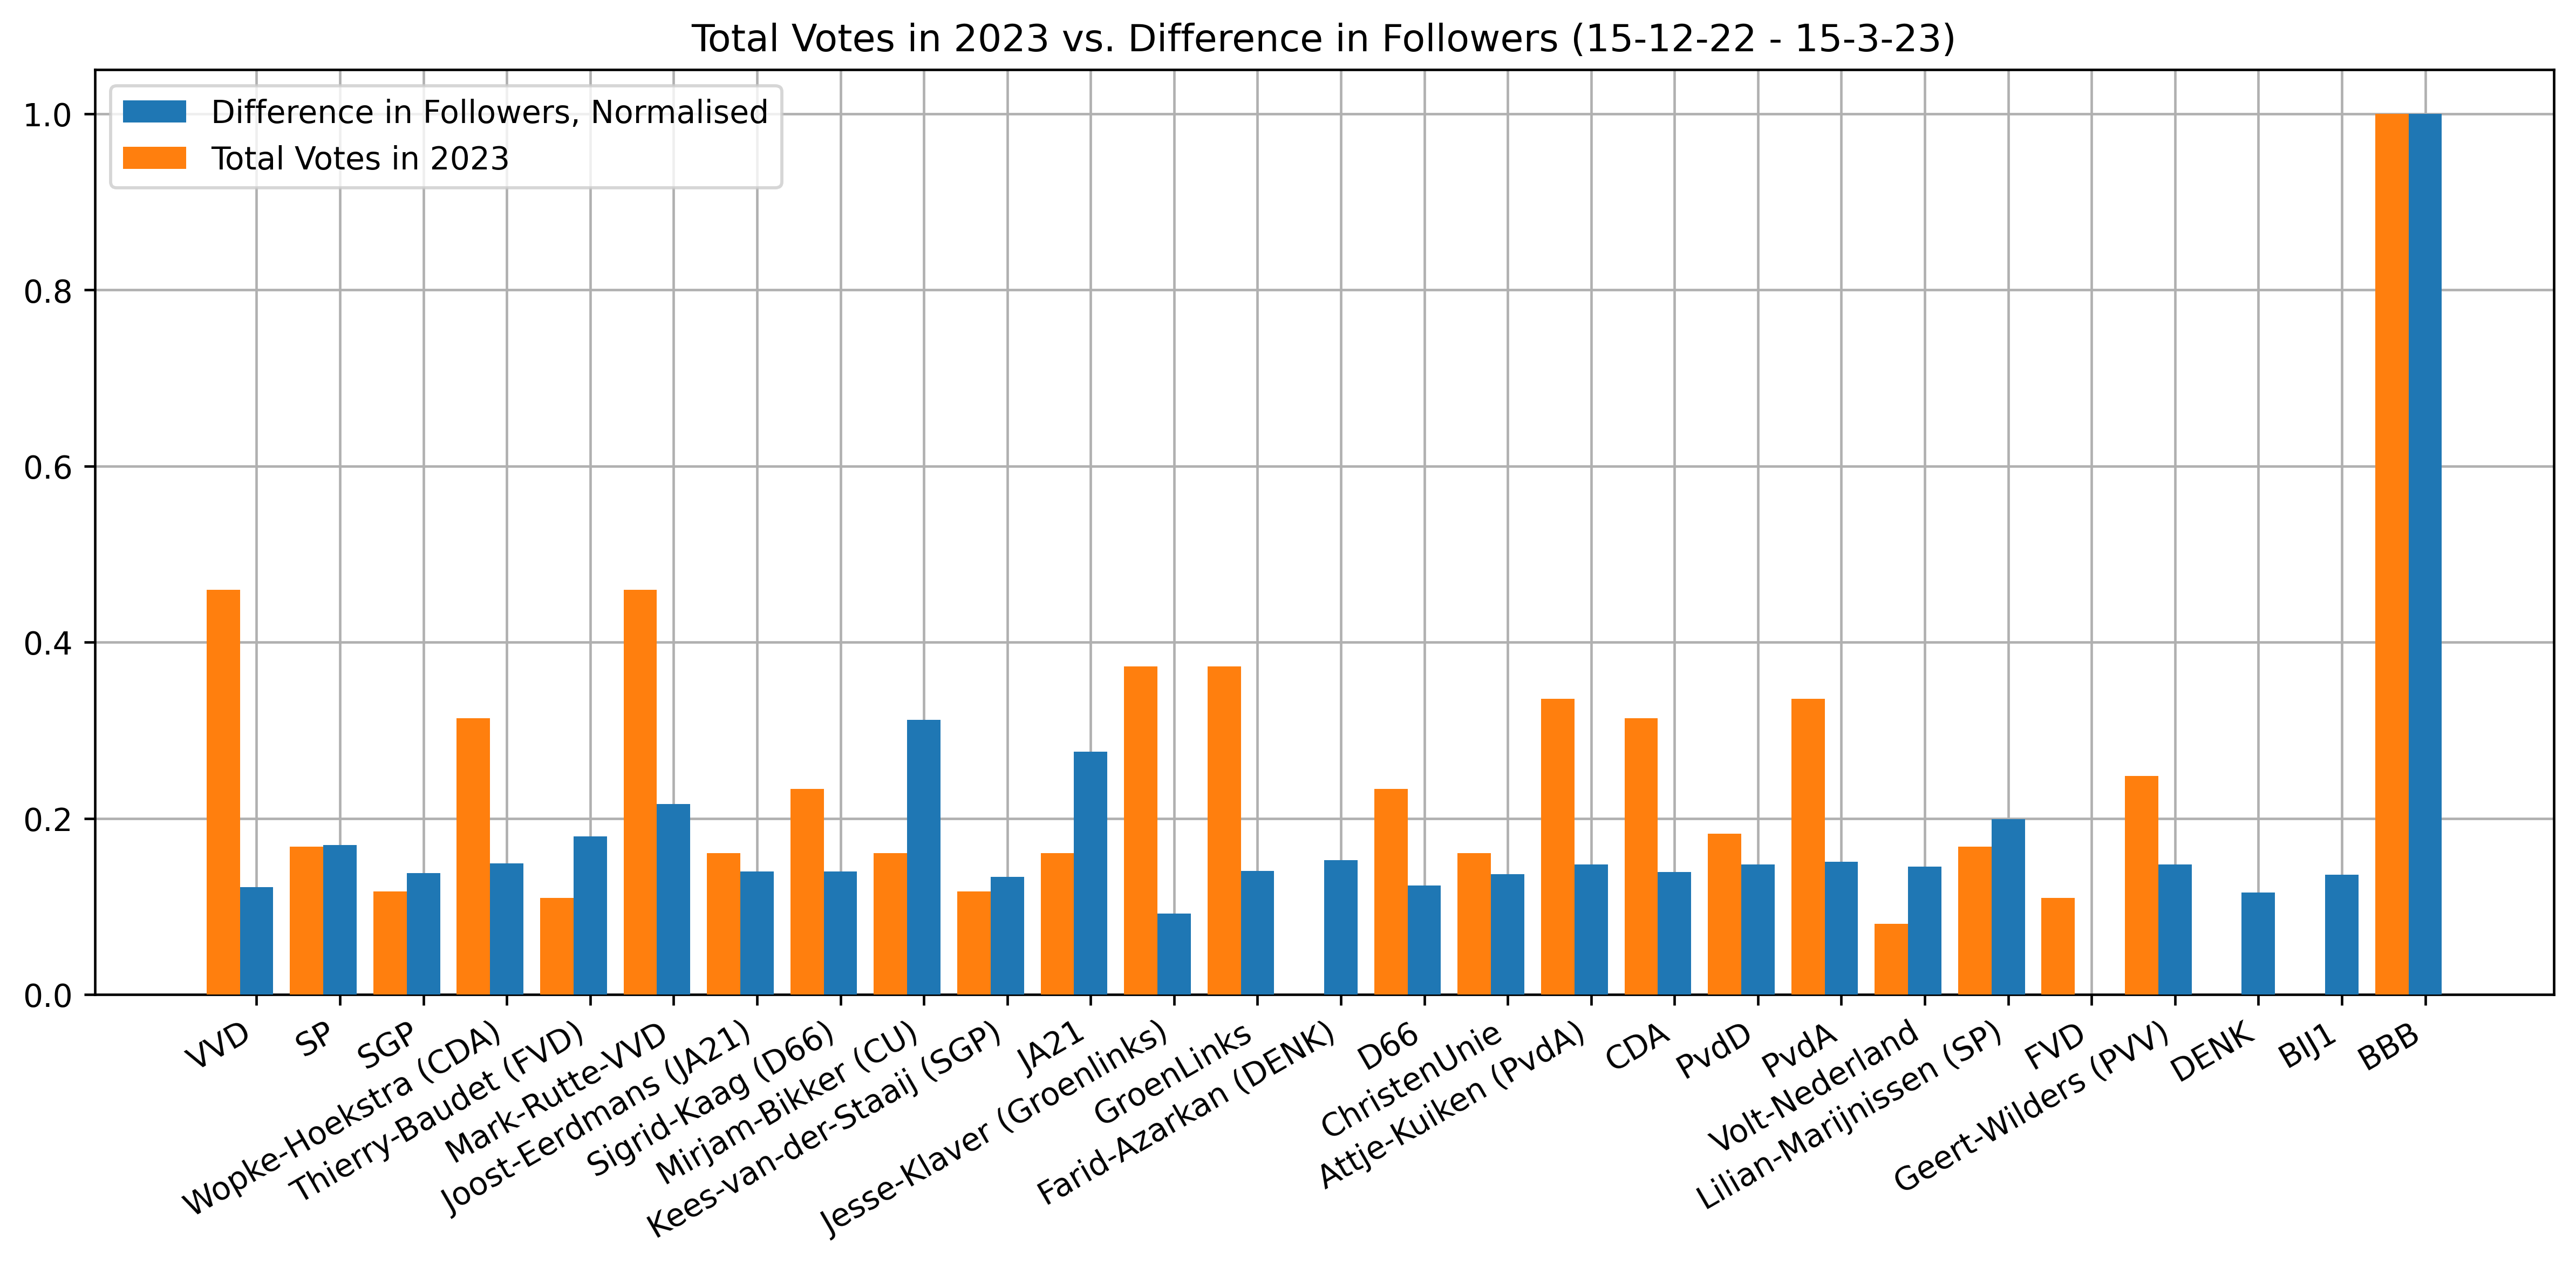

In [ ]:
fig, ax = plt.subplots (figsize=(14,6), dpi=420)
plt.title("Total Votes in 2023 vs. Difference in Followers (15-12-22 - 15-3-23)")
fig.autofmt_xdate()
plt.autoscale()
ax.grid(True,zorder=-0.5)
FollowsDiff=Normalise(FollowsDiff)
G1=ax.bar(Party,FollowsDiff,width=0.4,zorder=5)
x=[i for i in range(0,len(FollowsDiff))]
xtransposed=[]
for i in x:
  xtransposed.append(i-0.4)
VotesDeltaNorm=Normalise(Total2023Votes)
G2=ax.bar(xtransposed,VotesDeltaNorm,width=0.4,zorder=5)
ax.legend((G1,G2),("Difference in Followers, Normalised","Total Votes in 2023"))
plt.savefig("Total Votes in 2023 vs. Difference in Followers (15-12-22 - 15-3-23).png")

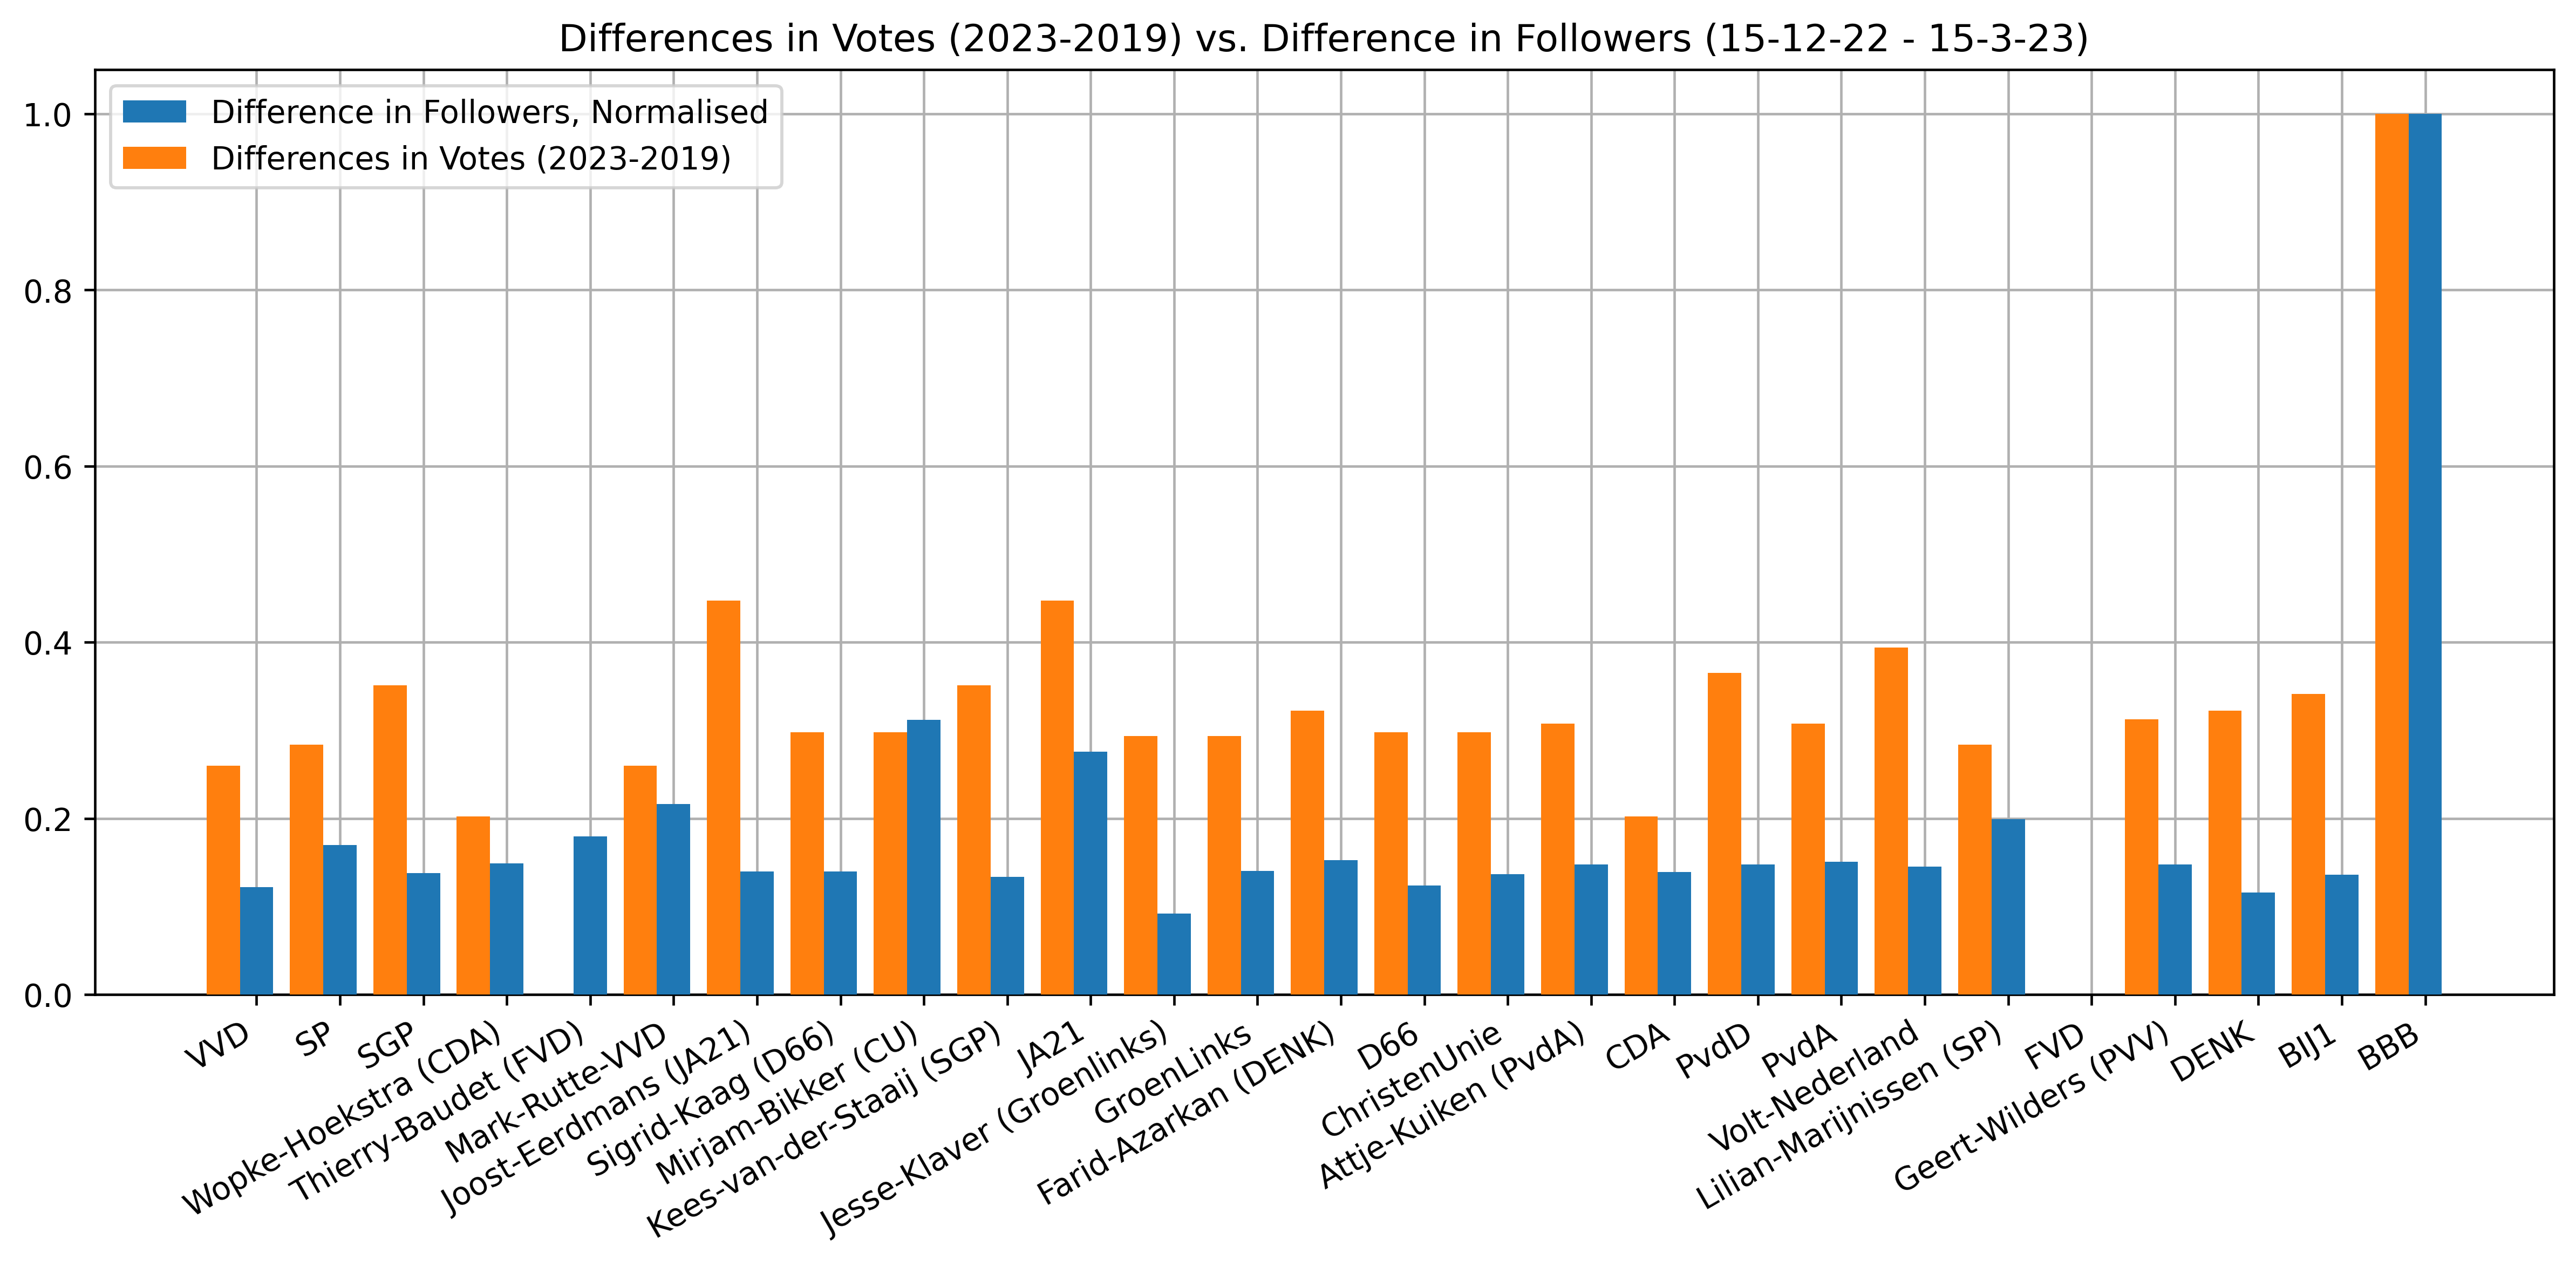

In [ ]:
fig, ax = plt.subplots (figsize=(14,6), dpi=420)
plt.title("Differences in Votes (2023-2019) vs. Difference in Followers (15-12-22 - 15-3-23)")
fig.autofmt_xdate()
plt.autoscale()
ax.grid(True,zorder=-0.5)
FollowsDiff=Normalise(FollowsDiff)
G1=ax.bar(Party,FollowsDiff,width=0.4,zorder=5)
x=[i for i in range(0,len(FollowsDiff))]
xtransposed=[]
for i in x:
  xtransposed.append(i-0.4)
VotesDeltaNorm=Normalise(DifferencesinVotes)
G2=ax.bar(xtransposed,VotesDeltaNorm,width=0.4,zorder=5)
ax.legend((G1,G2),("Difference in Followers, Normalised","Differences in Votes (2023-2019)"))
plt.savefig("Differences in Votes (2023-2019) vs. Difference in Followers (15-12-22 - 15-3-23).png")